In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import datasets, layers, models
import cv2 as cv


In [2]:

#load the dataset

(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
#airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
class_names = ['airplaen','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

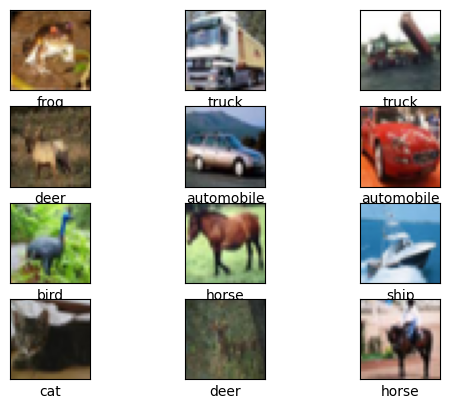

In [4]:
#have a look on the training images with the corresposding labels
for i in range(12):
  plt.subplot(4,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [5]:
#normalizing the images

train_images, test_images = train_images/255.0, test_images/255.0

In [6]:
#Reduce the size of data for training and testing
train_images = train_images[:30000]
train_labels = train_labels[:30000]
test_images = test_images[:4000]
test_labels = test_labels[:4000]


In [7]:
#Develop a cnn model

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation= 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10, activation= 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
#compile the model

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
#train the model

model.fit(train_images,train_labels, epochs= 10, validation_data=(test_images,test_labels))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 50s 51ms/step - accuracy: 0.2886 - loss: 1.8895 - val_accuracy: 0.5025 - val_loss: 1.3799
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.5316 - loss: 1.3191 - val_accuracy: 0.5627 - val_loss: 1.1991
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.5942 - loss: 1.1398 - val_accuracy: 0.5960 - val_loss: 1.1255
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.6322 - loss: 1.0393 - val_accuracy: 0.6125 - val_loss: 1.0904
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.6631 - loss: 0.9589 - val_accuracy: 0.6482 - val_loss: 1.0124
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 0.6873 - loss: 0.8867 - val_accuracy: 0.6260 - val_loss: 1.0862
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 0.7104 - loss: 0.8180 - val_accuracy: 0.6743 - val_loss: 0.9577
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 88s 54ms/step - accuracy: 0.7356 - loss: 0.7578 - 

In [10]:
#Model Evaluation
Loss, Accuracy = model.evaluate(test_images,test_labels)
print(f"Loss: {Loss} Accuracy: {Accuracy}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.6798 - loss: 0.9490
Loss: 0.9795798659324646 Accuracy: 0.6744999885559082


In [15]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_image(image_path, model):
  img = load_img(image_path, target_size = (32,32))
  img_array = img_to_array(img)
  img_array = np.expand_dims(img_array, axis = 0)
  img_array /= 255.0
  prediction = model.predict(img_array)
  class_index = np.argmax(prediction)
  class_name = class_names[class_index]
  return class_name

image_path =["/content/horse-4810484_640.jpg", "/content/horse-3611921_640.jpg", "/content/auto-2179220_640.jpg"]
for i in image_path:
  print(predict_image(i, model))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
truck


In [16]:
model.save('/content/drive/MyDrive/Image Processing/cnn-image-classifier.h5')